<a href="https://colab.research.google.com/github/snehapriya259/Portfolio-Optimization-/blob/main/Portfolio_Optimization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Load the dataset

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/raw_data.csv'

try:
  df = pd.read_csv(file_path)
  print(df.head()) # Display the first few rows of the dataframe
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
  print(f"Error: File at {file_path} is empty.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


         Date      Close       High        Low       Open    Volume  \
0  2015-01-01  70.628418  70.995976  69.273510  69.965378   3946806   
1  2015-01-02  70.974358  71.637398  70.628416  70.815805   6565229   
2  2015-01-05  72.149078  73.013913  70.729305  70.786960   9404837   
3  2015-01-06  71.601349  74.649902  69.792399  71.435592  18412441   
4  2015-01-07  70.967140  73.158062  69.475297  72.069808  10863352   

           Stock  
0  ADANIENT_data  
1  ADANIENT_data  
2  ADANIENT_data  
3  ADANIENT_data  
4  ADANIENT_data  


In [ ]:
df

,Date,Close,High,Low,Open,Volume,Stock
0,2015-01-01,70.628418,70.995976,69.273510,69.965378,3946806,ADANIENT_data
1,2015-01-02,70.974358,71.637398,70.628416,70.815805,6565229,ADANIENT_data
2,2015-01-05,72.149078,73.013913,70.729305,70.786960,9404837,ADANIENT_data
3,2015-01-06,71.601349,74.649902,69.792399,71.435592,18412441,ADANIENT_data
4,2015-01-07,70.967140,73.158062,69.475297,72.069808,10863352,ADANIENT_data
...,...,...,...,...,...,...,...
60955,2025-04-09,11397.049800,11423.000000,11180.000000,11288.849610,230611,ULTRACEMCO_data
60956,2025-04-11,11502.650390,11842.349610,11454.049800,11842.349610,351037,ULTRACEMCO_data
60957,2025-04-15,11719.000000,11749.000000,11581.000000,11749.000000,345260,ULTRACEMCO_data
60958,2025-04-16,11728.000000,11827.000000,11667.000000,11667.000000,268150,ULTRACEMCO_data


In [ ]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df.describe()

,Close,High,Low,Open,Volume
count,60960.000000,60960.000000,60960.000000,60960.000000,6.096000e+04
mean,1387.349096,1403.771743,1371.543880,1388.445061,9.360167e+06
std,2038.030923,2060.715389,2016.338428,2039.624959,1.351843e+07
min,28.003622,28.865619,27.687708,27.981049,0.000000e+00
25%,260.195229,263.931675,256.495558,260.390126,1.970964e+06
50%,608.201294,616.345680,601.580299,609.045106,5.322216e+06
75%,1469.634094,1485.290003,1454.660480,1470.336124,1.179441e+07
max,13495.599610,13551.996880,13274.450200,13383.000000,3.905778e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60960 entries, 0 to 60959
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    60960 non-null  object 
 1   Close   60960 non-null  float64
 2   High    60960 non-null  float64
 3   Low     60960 non-null  float64
 4   Open    60960 non-null  float64
 5   Volume  60960 non-null  int64  
 6   Stock   60960 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.3+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#To check for duplicate values
df.duplicated().sum()


np.int64(0)

In [ ]:
import numpy as np
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(df, x='Date', y='Close', color='Stock',
              title='Asset Prices Over Time')
fig.show()



#**Outlier detection**

In [ ]:
import pandas as pd
import numpy as np


def iqr_outlier_detection(data, method="capping"):
    """
    Detect and handle outliers for all numeric columns using IQR.
    Parameters:
    - data: DataFrame containing stock data for one stock.
    - method: Method to handle outliers ('capping' or 'removal').
    Returns:
    - Cleaned DataFrame with outliers handled.
    """
    numeric_columns = data.select_dtypes(include=np.number).columns  # Identify numeric columns
    for column in numeric_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == "capping":
            data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
            data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
        elif method == "removal":
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

cleaned_data = pd.DataFrame()
for stock, stock_data in df.groupby("Stock"):
    print(f"Processing stock: {stock}")
    stock_cleaned_data = iqr_outlier_detection(stock_data.copy(), method="capping")
    cleaned_data = pd.concat([cleaned_data, stock_cleaned_data], ignore_index=True)

print("Outlier detection and handling completed.")



Processing stock: ADANIENT_data
Processing stock: ADANIPORTS_data
Processing stock: AXISBANK_data
Processing stock: BAJFINANCE_data
Processing stock: BHARTIARTL_data
Processing stock: COALINDIA_data
Processing stock: HCLTECH_data
Processing stock: HDFCBANK_data
Processing stock: HINDUNILVR_data
Processing stock: ICICIBANK_data
Processing stock: INFY_data
Processing stock: IOC_data
Processing stock: ITC_data
Processing stock: LT_data
Processing stock: MARUTI_data
Processing stock: NTPC_data
Processing stock: POWERGRID_data
Processing stock: RELIANCE_data
Processing stock: SBIN_data
Processing stock: SUNPHARMA_data
Processing stock: TATAMOTORS_data
Processing stock: TCS_data
Processing stock: TITAN_data
Processing stock: ULTRACEMCO_data
Outlier detection and handling completed.


#**Log Transformation**

In [ ]:
import pandas as pd
import numpy as np

numeric_columns = cleaned_data.select_dtypes(include=np.number).columns

log_transformed_data = cleaned_data.copy()
for column in numeric_columns:
    log_transformed_data[column] = np.log1p(cleaned_data[column])  # Use np.log1p to handle zeros safely (log(1 + x))

log_transformed_data

,Date,Close,High,Low,Open,Volume,Stock
0,2015-01-01,4.271492,4.276610,4.252395,4.262192,15.188417,ADANIENT_data
1,2015-01-02,4.276310,4.285480,4.271492,4.274105,15.697298,ADANIENT_data
2,2015-01-05,4.292500,4.304253,4.272899,4.273703,16.056735,ADANIENT_data
3,2015-01-06,4.284984,4.326116,4.259752,4.282698,16.622259,ADANIENT_data
4,2015-01-07,4.276210,4.306199,4.255262,4.291415,16.200906,ADANIENT_data
...,...,...,...,...,...,...,...
60955,2025-04-09,9.341198,9.343472,9.321971,9.331659,12.348492,ULTRACEMCO_data
60956,2025-04-11,9.350420,9.379522,9.346186,9.379522,12.768650,ULTRACEMCO_data
60957,2025-04-15,9.369052,9.371609,9.357207,9.371609,12.752056,ULTRACEMCO_data
60958,2025-04-16,9.369820,9.378225,9.364605,9.364605,12.499306,ULTRACEMCO_data


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder()
log_transformed_data["Stock_Encoded"] = encoder.fit_transform(log_transformed_data["Stock"])
log_transformed_data

,Date,Close,High,Low,Open,Volume,Stock,Stock_Encoded
0,2015-01-01,4.271492,4.276610,4.252395,4.262192,15.188417,ADANIENT_data,0
1,2015-01-02,4.276310,4.285480,4.271492,4.274105,15.697298,ADANIENT_data,0
2,2015-01-05,4.292500,4.304253,4.272899,4.273703,16.056735,ADANIENT_data,0
3,2015-01-06,4.284984,4.326116,4.259752,4.282698,16.622259,ADANIENT_data,0
4,2015-01-07,4.276210,4.306199,4.255262,4.291415,16.200906,ADANIENT_data,0
...,...,...,...,...,...,...,...,...
60955,2025-04-09,9.341198,9.343472,9.321971,9.331659,12.348492,ULTRACEMCO_data,23
60956,2025-04-11,9.350420,9.379522,9.346186,9.379522,12.768650,ULTRACEMCO_data,23
60957,2025-04-15,9.369052,9.371609,9.357207,9.371609,12.752056,ULTRACEMCO_data,23
60958,2025-04-16,9.369820,9.378225,9.364605,9.364605,12.499306,ULTRACEMCO_data,23


In [ ]:
import pandas as pd
import numpy as np

def compute_rsi(series, window=14):
    delta = series.diff().shift(1)  # Critical shift to prevent look-ahead bias
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(alpha=1/window, min_periods=window, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/window, min_periods=window, adjust=False).mean()

    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_technical_factors(data):
    shifted_close = data["Close"].shift(1)

    data["SMA_50"] = shifted_close.rolling(window=50).mean()
    data["SMA_200"] = shifted_close.rolling(window=200).mean()

    ma_20 = shifted_close.rolling(window=20).mean()
    std_20 = shifted_close.rolling(window=20).std()
    data["Upper_BB"] = ma_20 + 2 * std_20
    data["Lower_BB"] = ma_20 - 2 * std_20

    data["Volatility"] = shifted_close.pct_change().rolling(window=30).std()
    data["RSI"] = compute_rsi(data["Close"])

    return data

data = pd.DataFrame()


for stock, stock_data in log_transformed_data.groupby("Stock"):
    print(f"Calculating technical factors for stock: {stock}")
    processed_data = calculate_technical_factors(stock_data)
    data = pd.concat([data, processed_data], ignore_index=True)

data = data.drop_duplicates()
data.to_csv("technical_factors_cleaned.csv", index=False)
print("Technical factors calculated. Cleaned dataset saved as 'technical_factors_cleaned.csv'.")
data


Calculating technical factors for stock: ADANIENT_data
Calculating technical factors for stock: ADANIPORTS_data
Calculating technical factors for stock: AXISBANK_data
Calculating technical factors for stock: BAJFINANCE_data
Calculating technical factors for stock: BHARTIARTL_data
Calculating technical factors for stock: COALINDIA_data
Calculating technical factors for stock: HCLTECH_data
Calculating technical factors for stock: HDFCBANK_data
Calculating technical factors for stock: HINDUNILVR_data
Calculating technical factors for stock: ICICIBANK_data
Calculating technical factors for stock: INFY_data
Calculating technical factors for stock: IOC_data
Calculating technical factors for stock: ITC_data
Calculating technical factors for stock: LT_data
Calculating technical factors for stock: MARUTI_data
Calculating technical factors for stock: NTPC_data
Calculating technical factors for stock: POWERGRID_data
Calculating technical factors for stock: RELIANCE_data
Calculating technical fact

,Date,Close,High,Low,Open,Volume,Stock,Stock_Encoded,SMA_50,SMA_200,Upper_BB,Lower_BB,Volatility,RSI
0,2015-01-01,4.271492,4.276610,4.252395,4.262192,15.188417,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,4.276310,4.285480,4.271492,4.274105,15.697298,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-05,4.292500,4.304253,4.272899,4.273703,16.056735,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-06,4.284984,4.326116,4.259752,4.282698,16.622259,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-07,4.276210,4.306199,4.255262,4.291415,16.200906,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60955,2025-04-09,9.341198,9.343472,9.321971,9.331659,12.348492,ULTRACEMCO_data,23,9.314497,9.332814,9.386048,9.233717,0.001931,53.840571
60956,2025-04-11,9.350420,9.379522,9.346186,9.379522,12.768650,ULTRACEMCO_data,23,9.314776,9.333177,9.387642,9.240130,0.001928,56.637549
60957,2025-04-15,9.369052,9.371609,9.357207,9.371609,12.752056,ULTRACEMCO_data,23,9.315138,9.333528,9.388394,9.249077,0.001922,58.854435
60958,2025-04-16,9.369820,9.378225,9.364605,9.364605,12.499306,ULTRACEMCO_data,23,9.315437,9.333944,9.391695,9.256565,0.001942,62.973198


In [ ]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
data.info()

Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60960 entries, 0 to 60959
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           60960 non-null  object 
 1   Close          60960 non-null  float64
 2   High           60960 non-null  float64
 3   Low            60960 non-null  float64
 4   Open           60960 non-null  float64
 5   Volume         60960 non-null  float64
 6   Stock          60960 non-null  object 
 7   Stock_Encoded  60960 non-null  int64  
 8   SMA_50         59760 non-null  float64
 9   SMA_200        56160 non-null  float64
 10  Upper_BB       60480 non-null  float64
 11  Lower_BB       60480 non-null  float64
 12  Volatility     60216 non-null  float64
 13  RSI            60648 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 6.5+ MB


In [ ]:
import pandas as pd
import numpy as np

def calculate_returns(data):
    data["Simple_Return"] = data["Close"].pct_change()
    data["Log_Return"] = np.log(data["Close"] / data["Close"].shift(1))
    return data

returns_data = pd.DataFrame()

for stock, stock_data in data.groupby("Stock"):
    print(f"Calculating returns for stock: {stock}")
    stock_data = calculate_returns(stock_data)
    returns_data = pd.concat([returns_data, stock_data], ignore_index=True)

returns_data


Calculating returns for stock: ADANIENT_data
Calculating returns for stock: ADANIPORTS_data
Calculating returns for stock: AXISBANK_data
Calculating returns for stock: BAJFINANCE_data
Calculating returns for stock: BHARTIARTL_data
Calculating returns for stock: COALINDIA_data
Calculating returns for stock: HCLTECH_data
Calculating returns for stock: HDFCBANK_data
Calculating returns for stock: HINDUNILVR_data
Calculating returns for stock: ICICIBANK_data
Calculating returns for stock: INFY_data
Calculating returns for stock: IOC_data
Calculating returns for stock: ITC_data
Calculating returns for stock: LT_data
Calculating returns for stock: MARUTI_data
Calculating returns for stock: NTPC_data
Calculating returns for stock: POWERGRID_data
Calculating returns for stock: RELIANCE_data
Calculating returns for stock: SBIN_data
Calculating returns for stock: SUNPHARMA_data
Calculating returns for stock: TATAMOTORS_data
Calculating returns for stock: TCS_data
Calculating returns for stock: T

,Date,Close,High,Low,Open,Volume,Stock,Stock_Encoded,SMA_50,SMA_200,Upper_BB,Lower_BB,Volatility,RSI,Simple_Return,Log_Return
0,2015-01-01,4.271492,4.276610,4.252395,4.262192,15.188417,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,4.276310,4.285480,4.271492,4.274105,15.697298,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN,0.001128,0.001127
2,2015-01-05,4.292500,4.304253,4.272899,4.273703,16.056735,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN,0.003786,0.003779
3,2015-01-06,4.284984,4.326116,4.259752,4.282698,16.622259,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.001751,-0.001753
4,2015-01-07,4.276210,4.306199,4.255262,4.291415,16.200906,ADANIENT_data,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.002048,-0.002050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60955,2025-04-09,9.341198,9.343472,9.321971,9.331659,12.348492,ULTRACEMCO_data,23,9.314497,9.332814,9.386048,9.233717,0.001931,53.840571,0.001197,0.001196
60956,2025-04-11,9.350420,9.379522,9.346186,9.379522,12.768650,ULTRACEMCO_data,23,9.314776,9.333177,9.387642,9.240130,0.001928,56.637549,0.000987,0.000987
60957,2025-04-15,9.369052,9.371609,9.357207,9.371609,12.752056,ULTRACEMCO_data,23,9.315138,9.333528,9.388394,9.249077,0.001922,58.854435,0.001993,0.001991
60958,2025-04-16,9.369820,9.378225,9.364605,9.364605,12.499306,ULTRACEMCO_data,23,9.315437,9.333944,9.391695,9.256565,0.001942,62.973198,0.000082,0.000082


In [ ]:

tech_columns = ["SMA_50", "SMA_200", "Upper_BB", "Lower_BB", "Volatility", "RSI"]

returns_data[tech_columns] = returns_data.groupby("Stock")[tech_columns].transform(lambda x: x.ffill().bfill())

returns_data = returns_data.dropna(subset=tech_columns, how='all')
returns_data[['Simple_Return', 'Log_Return']] = returns_data\
    .groupby('Stock')[['Simple_Return', 'Log_Return']]\
    .transform(lambda x: x.fillna(0, limit=1))  # Only fill first NaN

returns_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60960 entries, 0 to 60959
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           60960 non-null  object 
 1   Close          60960 non-null  float64
 2   High           60960 non-null  float64
 3   Low            60960 non-null  float64
 4   Open           60960 non-null  float64
 5   Volume         60960 non-null  float64
 6   Stock          60960 non-null  object 
 7   Stock_Encoded  60960 non-null  int64  
 8   SMA_50         60960 non-null  float64
 9   SMA_200        60960 non-null  float64
 10  Upper_BB       60960 non-null  float64
 11  Lower_BB       60960 non-null  float64
 12  Volatility     60960 non-null  float64
 13  RSI            60960 non-null  float64
 14  Simple_Return  60960 non-null  float64
 15  Log_Return     60960 non-null  float64
dtypes: float64(13), int64(1), object(2)
memory usage: 7.4+ MB


In [ ]:
import plotly.graph_objects as go

stock = 'ADANIENT_data'
df_stock = returns_data[returns_data['Stock'] == stock].set_index('Date')

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_stock.index, y=df_stock['Close'],
                         mode='lines', name='Close Price',
                         line=dict(color='black')))

fig.add_trace(go.Scatter(x=df_stock.index, y=df_stock['SMA_50'],
                         mode='lines', name='SMA 50',
                         line=dict(color='blue')))

fig.add_trace(go.Scatter(x=df_stock.index, y=df_stock['SMA_200'],
                         mode='lines', name='SMA 200',
                         line=dict(color='orange')))

fig.add_trace(go.Scatter(x=df_stock.index, y=df_stock['Upper_BB'],
                         mode='lines', name='Upper BB',
                         line=dict(color='green', dash='dash')))

fig.add_trace(go.Scatter(x=df_stock.index, y=df_stock['Lower_BB'],
                         mode='lines', name='Lower BB',
                         line=dict(color='red', dash='dash')))

fig.update_layout(title=f"{stock} - Price, SMA, and Bollinger Bands",
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

#correlation matrix

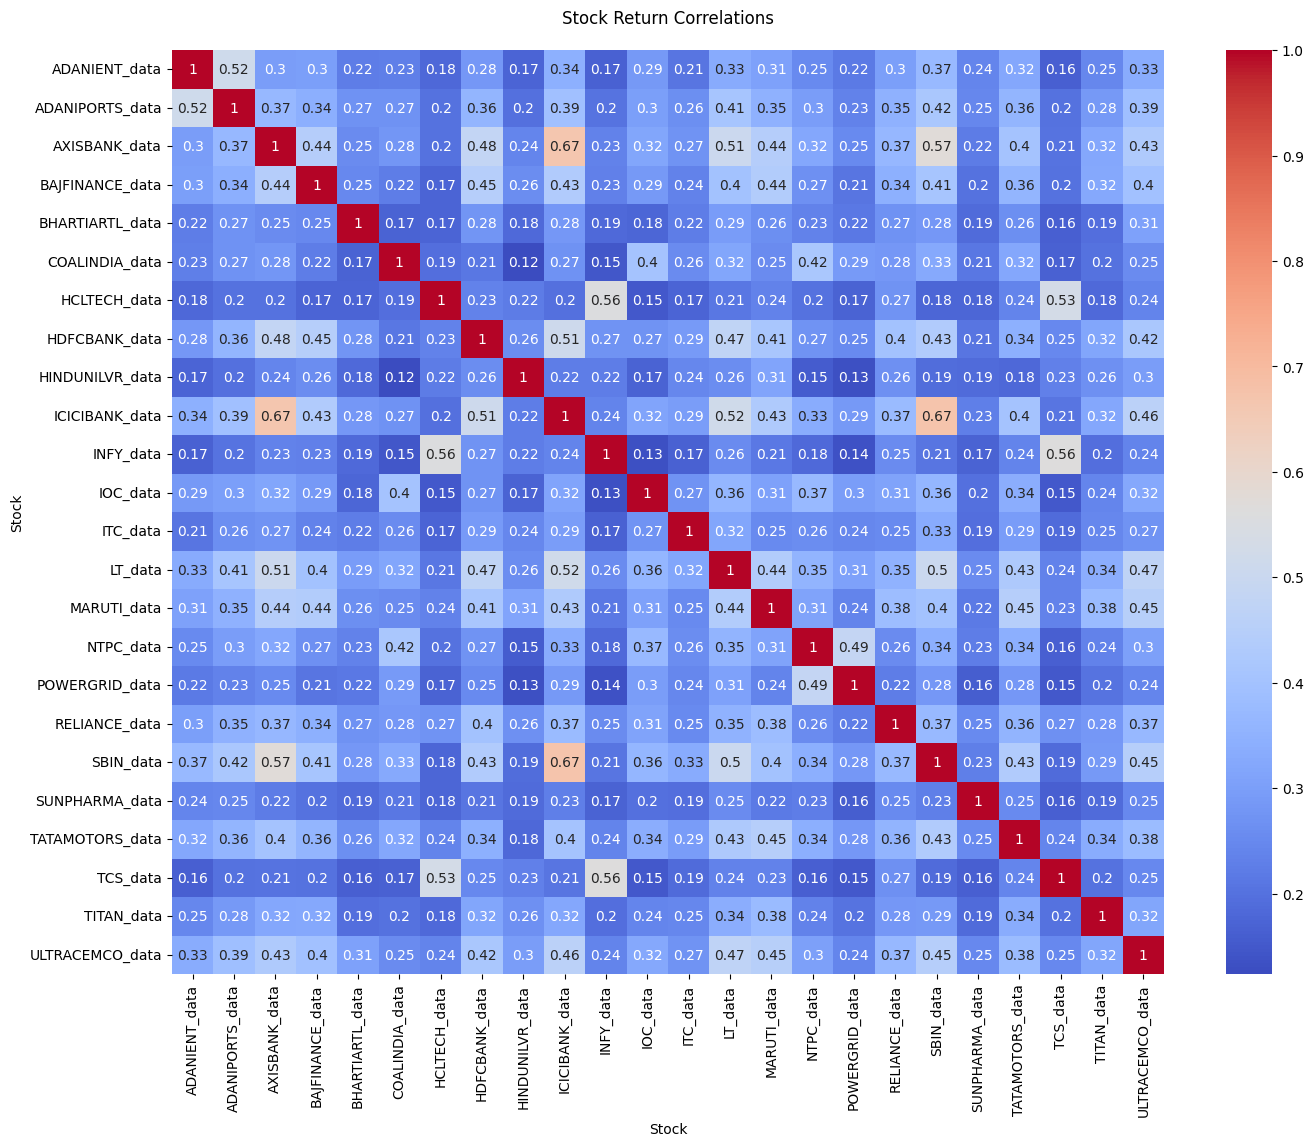

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


returns = returns_data.pivot(index='Date', columns='Stock', values='Simple_Return')

returns = returns.ffill().dropna(axis=0, how='any')

correlation_matrix = returns.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Return Correlations', y=1.02)

plt.show()


In [ ]:

corr_pairs = (
    correlation_matrix
    .rename_axis(index='Stock1', columns='Stock2')
    .stack()
    .reset_index()
    .rename(columns={0: 'Correlation'})
)

corr_pairs = corr_pairs[corr_pairs['Stock1'] < corr_pairs['Stock2']]

top_pairs = corr_pairs.nlargest(10, 'Correlation')

print("Top Correlated Stock Pairs:")
print(top_pairs)


Top Correlated Stock Pairs:
             Stock1           Stock2  Correlation
234  ICICIBANK_data        SBIN_data     0.673971
57    AXISBANK_data   ICICIBANK_data     0.667227
66    AXISBANK_data        SBIN_data     0.572772
261       INFY_data         TCS_data     0.564752
154    HCLTECH_data        INFY_data     0.556139
165    HCLTECH_data         TCS_data     0.530018
229  ICICIBANK_data          LT_data     0.518716
1     ADANIENT_data  ADANIPORTS_data     0.515334
177   HDFCBANK_data   ICICIBANK_data     0.511034
61    AXISBANK_data          LT_data     0.506985


In [ ]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 17.3 MB/s eta 0:00:00


In [ ]:
!pip install riskfolio-lib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.8/314.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 7.6 MB/s eta 0:00:00


In [ ]:
import sys
print(sys.version)
!pip show riskfolio
!pip install riskfolio

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
ERROR: Could not find a version that satisfies the requirement riskfolio (from versions: none)
ERROR: No matching distribution found for riskfolio


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
from pypfopt.black_litterman import BlackLittermanModel, market_implied_prior_returns
from pypfopt import CLA
import riskfolio as riskfolio
from riskfolio import Portfolio


df['Date'] = pd.to_datetime(df['Date'])
df_pivot = df.pivot(index='Date', columns='Stock', values='Close')

df_pivot = df_pivot.dropna()

returns = df_pivot.pct_change().dropna()

mu = expected_returns.mean_historical_return(df_pivot)
S = risk_models.sample_cov(df_pivot)

# Mean-Variance Optimization (Sharpe Maximization)
ef = EfficientFrontier(mu, S)
raw_weights_mv = ef.max_sharpe()
cleaned_weights_mv = ef.clean_weights()
print("Mean-Variance Optimization ")
perf_mv = ef.portfolio_performance(verbose=True)

# Minimum Volatility Portfolio
ef_minvol = EfficientFrontier(mu, S)
raw_weights_minvol = ef_minvol.min_volatility()
cleaned_weights_minvol = ef_minvol.clean_weights()

print("Minimum Volatility Portfolio")
perf_minvol = ef_minvol.portfolio_performance(verbose=True)


Mean-Variance Optimization 
Expected annual return: 25.6%
Annual volatility: 18.6%
Sharpe Ratio: 1.38
Minimum Volatility Portfolio
Expected annual return: 14.1%
Annual volatility: 13.9%
Sharpe Ratio: 1.02


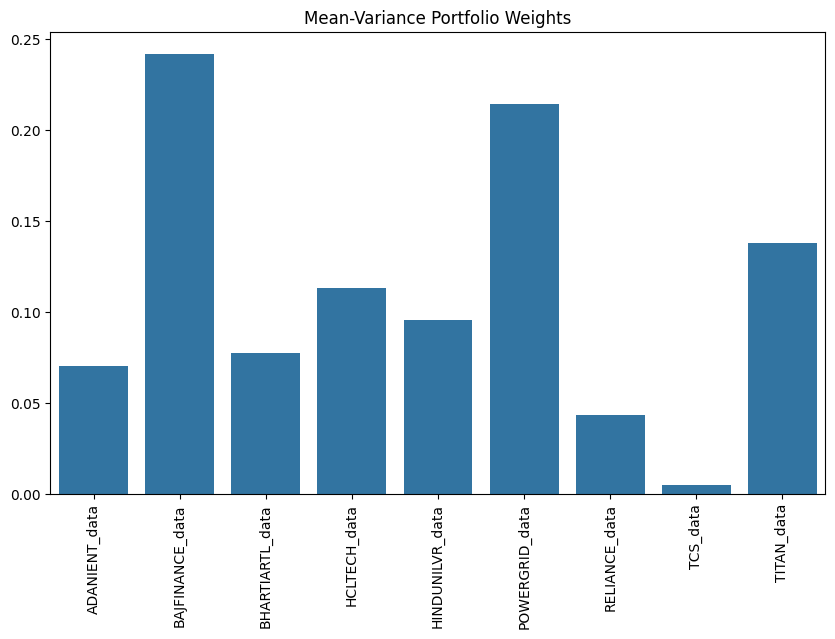

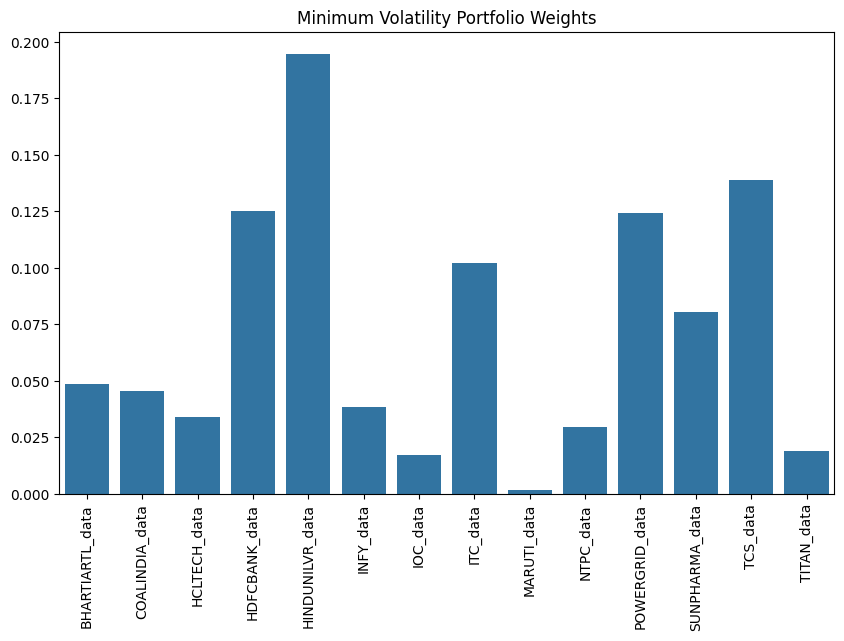

In [ ]:

def plot_weights(weights, title):
    plt.figure(figsize=(10,6))
    weights = {k: v for k,v in weights.items() if v > 0.001}
    sns.barplot(x=list(weights.keys()), y=list(weights.values()))
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

plot_weights(cleaned_weights_mv, "Mean-Variance Portfolio Weights")
plot_weights(cleaned_weights_minvol, "Minimum Volatility Portfolio Weights")

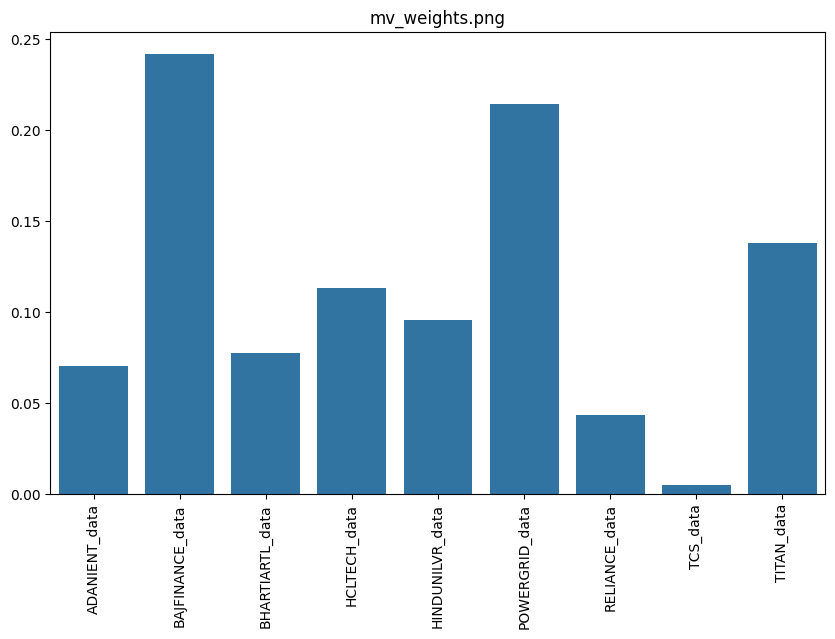

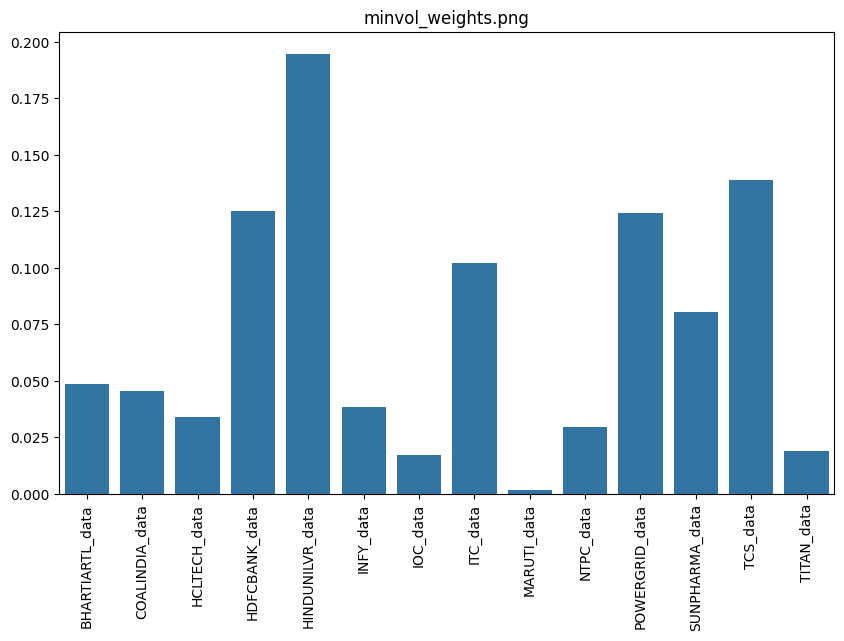

In [ ]:

def weights_to_markdown_table(weights_dict):
    """Convert weights dictionary to markdown table using pandas"""
    weights_series = pd.Series(weights_dict)
    return weights_series.to_markdown(floatfmt=".2%")

ef = EfficientFrontier(mu, S)
raw_weights_mv = ef.max_sharpe()
cleaned_weights_mv = ef.clean_weights()

expected_return_mv, volatility_mv, sharpe_mv = ef.portfolio_performance()

mv_md = f"""
## Mean-Variance Optimization Evaluation

### Key Metrics
- **Expected Annual Return**: {expected_return_mv:.2%}
- **Annual Volatility**: {volatility_mv:.2%}
- **Sharpe Ratio**: {sharpe_mv:.2f}

### Portfolio Characteristics
| Metric | Value |
|--------|-------|
| Number of Assets | {len(cleaned_weights_mv)} |
| Max Allocation | {max(cleaned_weights_mv.values()):.2%} |
| Min Allocation | {min(cleaned_weights_mv.values()):.2%} |

### Weight Distribution
{weights_to_markdown_table(cleaned_weights_mv)}

![MV Weights Distribution](mv_weights.png)
"""

plot_weights(cleaned_weights_mv, "mv_weights.png")

ef_minvol = EfficientFrontier(mu, S)
raw_weights_minvol = ef_minvol.min_volatility()
cleaned_weights_minvol = ef_minvol.clean_weights()

expected_return_minvol, volatility_minvol, sharpe_minvol = ef_minvol.portfolio_performance()

minvol_md = f"""
## Minimum Volatility Portfolio Evaluation

### Key Metrics
- **Expected Annual Return**: {expected_return_minvol:.2%}
- **Annual Volatility**: {volatility_minvol:.2%}
- **Sharpe Ratio**: {sharpe_minvol:.2f}

### Portfolio Characteristics
| Metric | Value |
|--------|-------|
| Number of Assets | {len(cleaned_weights_minvol)} |
| Max Allocation | {max(cleaned_weights_minvol.values()):.2%} |
| Min Allocation | {min(cleaned_weights_minvol.values()):.2%} |

### Weight Distribution
{weights_to_markdown_table(cleaned_weights_minvol)}

![MinVol Weights Distribution](minvol_weights.png)
"""

plot_weights(cleaned_weights_minvol, "minvol_weights.png")

def weights_to_markdown_table(weights):
    return pd.Series(weights).to_markdown()

def plot_weights(weights, filename):
    plt.figure(figsize=(12, 6))
    pd.Series(weights).plot.bar()
    plt.title("Portfolio Weights Distribution")
    plt.ylabel("Allocation (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

final_report = f"""
# Portfolio Optimization Report
## Analysis Date: {pd.Timestamp.today().date()}

{mv_md}

{minvol_md}

## Comparative Analysis
| Metric                | Mean-Variance | Min Volatility |
|-----------------------|---------------|----------------|
| Expected Return       | {expected_return_mv:.2%} | {expected_return_minvol:.2%} |
| Volatility            | {volatility_mv:.2%} | {volatility_minvol:.2%} |
| Sharpe Ratio          | {sharpe_mv:.2f} | {sharpe_minvol:.2f} |
| Max Single Allocation | {max(cleaned_weights_mv.values()):.2%} | {max(cleaned_weights_minvol.values()):.2%} |
"""

with open("portfolio_analysis.md", "w") as f:
    f.write(final_report)


In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2540 entries, 2015-01-01 to 2025-04-17
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ADANIENT_data    2540 non-null   float64
 1   ADANIPORTS_data  2540 non-null   float64
 2   AXISBANK_data    2540 non-null   float64
 3   BAJFINANCE_data  2540 non-null   float64
 4   BHARTIARTL_data  2540 non-null   float64
 5   COALINDIA_data   2540 non-null   float64
 6   HCLTECH_data     2540 non-null   float64
 7   HDFCBANK_data    2540 non-null   float64
 8   HINDUNILVR_data  2540 non-null   float64
 9   ICICIBANK_data   2540 non-null   float64
 10  INFY_data        2540 non-null   float64
 11  IOC_data         2540 non-null   float64
 12  ITC_data         2540 non-null   float64
 13  LT_data          2540 non-null   float64
 14  MARUTI_data      2540 non-null   float64
 15  NTPC_data        2540 non-null   float64
 16  POWERGRID_data   2540 non-null   float64
 

<ipython-input-36-94f26cc104ff>:16: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



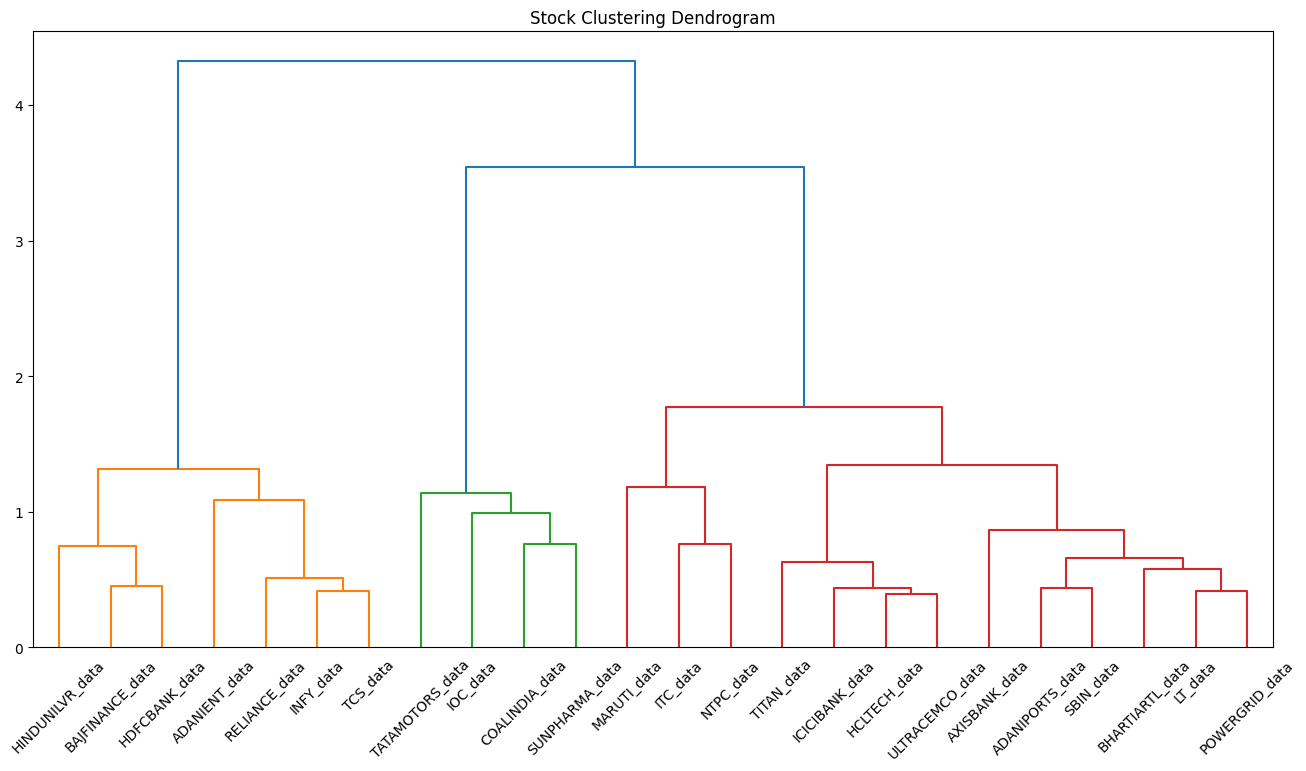

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

correlation_matrix = df_pivot.corr()

distance_matrix = np.sqrt(2 * (1 - np.abs(correlation_matrix)))

linked = linkage(distance_matrix, method='ward')

plt.figure(figsize=(16, 8))
dendrogram(linked, labels=df_pivot.columns, orientation='top')
plt.title("Stock Clustering Dendrogram")
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 5
clusters = fcluster(linked, num_clusters, criterion='maxclust')

distance_threshold = 0.2  # sqrt(2*(1-0.8)) ≈ 0.2
clusters = fcluster(linked, distance_threshold, criterion='distance')

cluster_map = pd.DataFrame({'Stock': df_pivot.columns, 'Cluster': clusters})


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
max_clusters = 10

for n in range(2, max_clusters+1):
    clusters = fcluster(linked, n, criterion='maxclust')
    silhouette_scores.append(silhouette_score(distance_matrix, clusters))

optimal_clusters = np.argmax(silhouette_scores) + 2

clusters = fcluster(linked, optimal_clusters, criterion='maxclust')
cluster_map = pd.DataFrame({'Stock': returns.columns, 'Cluster': clusters})

cluster_weights = {}
for cluster_id in cluster_map['Cluster'].unique():
    cluster_stocks = cluster_map[cluster_map['Cluster'] == cluster_id]['Stock']
    cluster_weights[cluster_id] = len(cluster_stocks) / len(cluster_map)  # Size-proportional weight

portfolio_weights = {}
for cluster_id, weight in cluster_weights.items():
    cluster_stocks = cluster_map[cluster_map['Cluster'] == cluster_id]['Stock']
    stock_weight = weight / len(cluster_stocks)
    portfolio_weights.update({stock: stock_weight for stock in cluster_stocks})

print(pd.Series(portfolio_weights))


ADANIENT_data      0.041667
BAJFINANCE_data    0.041667
HDFCBANK_data      0.041667
HINDUNILVR_data    0.041667
INFY_data          0.041667
RELIANCE_data      0.041667
TCS_data           0.041667
ADANIPORTS_data    0.041667
AXISBANK_data      0.041667
BHARTIARTL_data    0.041667
HCLTECH_data       0.041667
ICICIBANK_data     0.041667
ITC_data           0.041667
LT_data            0.041667
MARUTI_data        0.041667
NTPC_data          0.041667
POWERGRID_data     0.041667
SBIN_data          0.041667
TITAN_data         0.041667
ULTRACEMCO_data    0.041667
COALINDIA_data     0.041667
IOC_data           0.041667
SUNPHARMA_data     0.041667
TATAMOTORS_data    0.041667
dtype: float64


In [ ]:

sector_map = {
    'AXISBANK_data': 'Financial Services',
    'BAJFINANCE_data': 'Financial Services',
    'HDFCBANK_data': 'Financial Services',
    'ICICIBANK_data': 'Financial Services',
    'SBIN_data': 'Financial Services',
    'KOTAKBANK_data': 'Financial Services',
    'RELIANCE_data': 'Oil & Gas',
    'IOC_data': 'Oil & Gas',
    'ONGC_data': 'Oil & Gas',
    'INFY_data': 'Information Technology',
    'TCS_data': 'Information Technology',
    'HCLTECH_data': 'Information Technology',
    'WIPRO_data': 'Information Technology',
    'ITC_data': 'FMCG',
    'HINDUNILVR_data': 'FMCG',
    'TITAN_data': 'Consumer Durables',
    'MARUTI_data': 'Automobile',
    'TATAMOTORS_data': 'Automobile',
    'M&M_data': 'Automobile',
    'LT_data': 'Construction',
    'ULTRACEMCO_data': 'Construction Materials',
    'ADANIPORTS_data': 'Infrastructure',
    'SUNPHARMA_data': 'Pharmaceuticals',
    'DRREDDY_data': 'Pharmaceuticals',
    'NTPC_data': 'Power',
    'POWERGRID_data': 'Power',
    'ADANIENT_data': 'Materials',
    'COALINDIA_data': 'Mining'
}

cluster_sectors = cluster_map.copy()
cluster_sectors['Sector'] = cluster_sectors['Stock'].map(sector_map)

cross_tab = pd.crosstab(
    index=cluster_sectors['Cluster'],
    columns=cluster_sectors['Sector'],
    margins=True,
    margins_name="Total"
)
print("Cluster-Sector Alignment:")
print(cross_tab.style.format("{:.0f}").to_string())
display(cross_tab.style.format("{:.0f}"))
cross_tab.style.format("{:.0f}").to_html("sector_clusters.html")


Cluster-Sector Alignment:
Sector Automobile Construction Construction Materials Consumer Durables FMCG Financial Services Information Technology Infrastructure Materials Mining Oil & Gas Pharmaceuticals Power Total
Cluster              
1 0 0 0 0 1 2 2 0 1 0 1 0 0 7
2 1 0 0 0 0 0 0 0 0 1 1 1 0 4
3 1 1 1 1 1 3 1 1 0 0 0 0 2 12
Total 2 1 1 1 2 5 3 1 1 1 2 1 2 23



Sector,Automobile,Construction,Construction Materials,Consumer Durables,FMCG,Financial Services,Information Technology,Infrastructure,Materials,Mining,Oil & Gas,Pharmaceuticals,Power,Total
Cluster,,,,,,,,,,,,,,
1,0,0,0,0,1,2,2,0,1,0,1,0,0,7
2,1,0,0,0,0,0,0,0,0,1,1,1,0,4
3,1,1,1,1,1,3,1,1,0,0,0,0,2,12
Total,2,1,1,1,2,5,3,1,1,1,2,1,2,23


In [ ]:
from sklearn.metrics import silhouette_score
num_clusters=2
distance_matrix = np.sqrt(2 * (1 - abs(correlation_matrix)))

score = silhouette_score(distance_matrix, clusters, metric='precomputed')

print(f"Silhouette Score for {num_clusters} clusters: {score:.3f}")


Silhouette Score for 2 clusters: 0.239


In [ ]:

intra_corrs = []
for cluster_id in cluster_map.Cluster.unique():
    stocks = cluster_map[cluster_map.Cluster == cluster_id]['Stock']
    cluster_corr = correlation_matrix.loc[stocks, stocks].values
    intra_corrs.append(cluster_corr.mean())

print(f"Average Intra-Cluster Correlation: {np.mean(intra_corrs):.2f}")


Average Intra-Cluster Correlation: 0.92


In [ ]:

sector_map = {
    'AXISBANK_data': 'Financial Services',
    'BAJFINANCE_data': 'Financial Services',
    'HDFCBANK_data': 'Financial Services',
    'ICICIBANK_data': 'Financial Services',
    'SBIN_data': 'Financial Services',
    'KOTAKBANK_data': 'Financial Services',
    'RELIANCE_data': 'Oil & Gas',
    'IOC_data': 'Oil & Gas',
    'ONGC_data': 'Oil & Gas',
    'INFY_data': 'Information Technology',
    'TCS_data': 'Information Technology',
    'HCLTECH_data': 'Information Technology',
    'WIPRO_data': 'Information Technology',
    'ITC_data': 'FMCG',
    'HINDUNILVR_data': 'FMCG',
    'TITAN_data': 'Consumer Durables',
    'MARUTI_data': 'Automobile',
    'TATAMOTORS_data': 'Automobile',
    'M&M_data': 'Automobile',
    'LT_data': 'Construction',
    'ULTRACEMCO_data': 'Construction Materials',
    'ADANIPORTS_data': 'Infrastructure',
    'SUNPHARMA_data': 'Pharmaceuticals',
    'DRREDDY_data': 'Pharmaceuticals',
    'NTPC_data': 'Power',
    'POWERGRID_data': 'Power',
    'ADANIENT_data': 'Materials',
    'COALINDIA_data': 'Mining',
    'BHARTIARTL_data': 'Telecom'
}


cluster_sectors = pd.DataFrame({
    'Stock': returns.columns,
    'Cluster': clusters,
    'Sector': [sector_map.get(stock, 'Unknown') for stock in returns.columns]
})

sector_cluster_tab = pd.crosstab(
    cluster_sectors['Cluster'],
    cluster_sectors['Sector'],
    margins=True,
    margins_name="Total"
)

print(sector_cluster_tab)


Sector   Automobile  Construction  Construction Materials  Consumer Durables  \
Cluster                                                                        
1                 0             0                       0                  0   
2                 1             0                       0                  0   
3                 1             1                       1                  1   
Total             2             1                       1                  1   

Sector   FMCG  Financial Services  Information Technology  Infrastructure  \
Cluster                                                                     
1           1                   2                       2               0   
2           0                   0                       0               0   
3           1                   3                       1               1   
Total       2                   5                       3               1   

Sector   Materials  Mining  Oil & Gas  Pharmaceuticals  

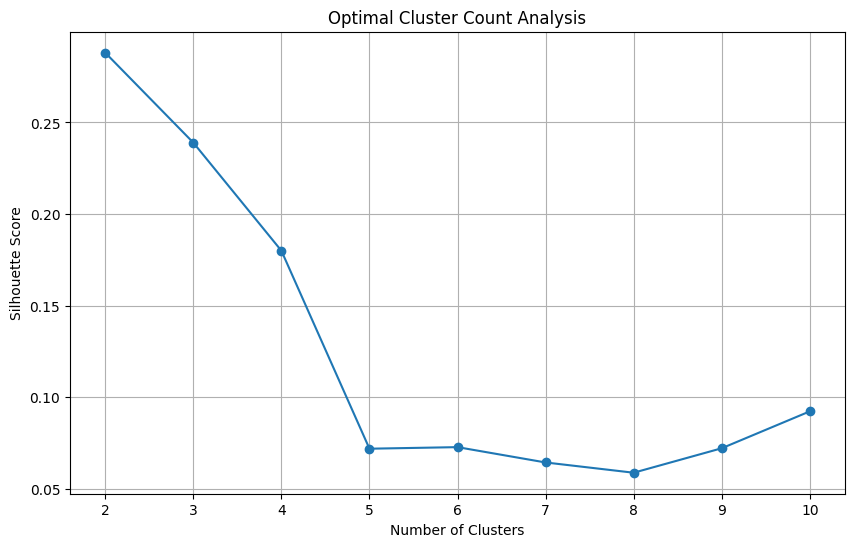

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


cluster_range = range(2, 11)
scores = []

for n in cluster_range:
    clusters = fcluster(linked, n, criterion='maxclust')
    score = silhouette_score(distance_matrix, clusters, metric='precomputed')
    scores.append(score)


plt.figure(figsize=(10,6))
plt.plot(cluster_range, scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Cluster Count Analysis")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from pypfopt import EfficientFrontier, risk_models, expected_returns
import riskfolio as rp

# 1. Calculate returns from prices
returns = df_pivot.pct_change().dropna()

# 2. HRP Optimization with Riskfolio
hrp = rp.HCPortfolio(returns=returns)
hrp_weights = hrp.optimization(model="HRP")
hrp_weights_dict = hrp_weights['weights'].to_dict()

# 3. Calculate HRP performance using actual returns
hrp_portfolio_returns = (returns * pd.Series(hrp_weights_dict)).sum(axis=1)
hrp_annual_return = hrp_portfolio_returns.mean() * 252
hrp_annual_vol = hrp_portfolio_returns.std() * np.sqrt(252)
hrp_sharpe = hrp_annual_return / hrp_annual_vol

# 4. Cluster-Equal Performance (using proper covariance)
mu = expected_returns.mean_historical_return(df_pivot)
S = risk_models.CovarianceShrinkage(df_pivot).ledoit_wolf()

ef = EfficientFrontier(mu, S)
ef.set_weights(portfolio_weights)
cluster_return, cluster_vol, cluster_sharpe = ef.portfolio_performance()

# 5. Traditional Mean-Variance
ef_mv = EfficientFrontier(mu, S)
ef_mv.max_sharpe()
mv_return, mv_vol, mv_sharpe = ef_mv.portfolio_performance()


# 5. Minimum Volatility Portfolio
ef_minvol = EfficientFrontier(mu, S)
ef_minvol.min_volatility()
minvol_return, minvol_vol, minvol_sharpe = ef_minvol.portfolio_performance()

# 6. Print all results in table format
print(f"""
| Metric          | HRP      | Cluster-Equal | Mean-Variance | Min Volatility |
|-----------------|----------|---------------|---------------|----------------|
| Return          | {hrp_annual_return:.2%} | {cluster_return:.2%} | {mv_return:.2%} | {minvol_return:.2%} |
| Volatility      | {hrp_annual_vol:.2%} | {cluster_vol:.2%} | {mv_vol:.2%} | {minvol_vol:.2%} |
| Sharpe Ratio    | {hrp_sharpe:.2f} | {cluster_sharpe:.2f} | {mv_sharpe:.2f} | {minvol_sharpe:.2f} |
""")




| Metric          | HRP      | Cluster-Equal | Mean-Variance | Min Volatility |
|-----------------|----------|---------------|---------------|----------------|
| Return          | 18.54% | 16.50% | 25.61% | 14.15% |
| Volatility      | 15.41% | 17.18% | 18.53% | 13.82% |
| Sharpe Ratio    | 1.20 | 0.96 | 1.38 | 1.02 |




| Metric          | HRP      | Cluster-Equal | Mean-Variance | Min Volatility |
|-----------------|----------|---------------|---------------|----------------|
| Return          | 18.54% | 16.50% | 25.61% | 14.15% |
| Volatility      | 15.41% | 17.18% | 18.53% | 13.82% |
| Sharpe Ratio    | 1.20 | 0.96 | 1.38 | 1.02 |
| Max Drawdown    | 33.12% | 37.58% | 35.77% | 25.44% |
| Recovery Days   | 66 | 66 | 32 | 66 |



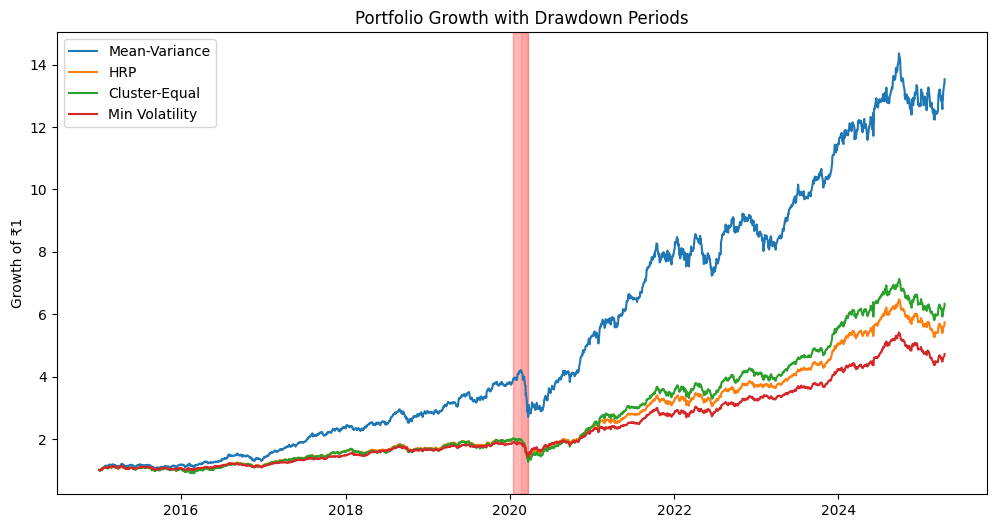

In [ ]:

def max_drawdown(returns_series):
    """
    Calculate maximum drawdown and duration for a return series.
    Returns:
        max_dd: Maximum drawdown (positive value)
        dd_start: Start date of max drawdown
        dd_end: End date of recovery
    """
    wealth_index = (1 + returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks

    max_dd = drawdowns.min()
    end = drawdowns.idxmin()
    start = wealth_index[:end].idxmax()

    return max_dd, start, end

strategies = {
    'Mean-Variance': cleaned_weights_mv,
    'HRP': hrp_weights_dict,
    'Cluster-Equal': portfolio_weights,
    'Min Volatility': cleaned_weights_minvol
}

dd_results = {}

for name, weights in strategies.items():
    port_returns = (returns * pd.Series(weights)).sum(axis=1)
    dd, start, end = max_drawdown(port_returns)
    dd_results[name] = {
        'Max Drawdown': dd,
        'Drawdown Start': start,
        'Drawdown End': end,
        'Recovery Days': (end - start).days if pd.notnull(end) else None
    }

print(f"""
| Metric          | HRP      | Cluster-Equal | Mean-Variance | Min Volatility |
|-----------------|----------|---------------|---------------|----------------|
| Return          | {hrp_annual_return:.2%} | {cluster_return:.2%} | {mv_return:.2%} | {minvol_return:.2%} |
| Volatility      | {hrp_annual_vol:.2%} | {cluster_vol:.2%} | {mv_vol:.2%} | {minvol_vol:.2%} |
| Sharpe Ratio    | {hrp_sharpe:.2f} | {cluster_sharpe:.2f} | {mv_sharpe:.2f} | {minvol_sharpe:.2f} |
| Max Drawdown    | {-dd_results['HRP']['Max Drawdown']:.2%} | {-dd_results['Cluster-Equal']['Max Drawdown']:.2%} | {-dd_results['Mean-Variance']['Max Drawdown']:.2%} | {-dd_results['Min Volatility']['Max Drawdown']:.2%} |
| Recovery Days   | {dd_results['HRP']['Recovery Days']} | {dd_results['Cluster-Equal']['Recovery Days']} | {dd_results['Mean-Variance']['Recovery Days']} | {dd_results['Min Volatility']['Recovery Days']} |
""")


plt.figure(figsize=(12, 6))
for name in strategies.keys():
    port_returns = (returns * pd.Series(strategies[name])).sum(axis=1)
    wealth_index = (1 + port_returns).cumprod()
    plt.plot(wealth_index, label=name)

plt.title("Portfolio Growth with Drawdown Periods")
plt.ylabel("Growth of ₹1")
plt.legend()
for name, data in dd_results.items():
    plt.axvspan(data['Drawdown Start'], data['Drawdown End'] if data['Drawdown End'] else wealth_index.index[-1],
                alpha=0.1, color='red')
plt.show()


In [ ]:

metrics_table = pd.DataFrame({
    'Metric': ['Return', 'Volatility', 'Sharpe Ratio', 'Max Drawdown', 'Recovery Days'],
    'HRP': ['18.54%', '15.41%', '1.20', '33.12%', '66'],
    'Cluster-Equal': ['16.50%', '17.18%', '0.96', '37.58%', '66'],
    'Mean-Variance': ['25.61%', '18.53%', '1.38', '35.77%', '32'],
    'Min Volatility': ['14.15%', '13.82%', '1.02', '25.44%', '66']
})


print(metrics_table.to_string(index=False))
print(metrics_table.to_markdown(index=False))


       Metric    HRP Cluster-Equal Mean-Variance Min Volatility
       Return 18.54%        16.50%        25.61%         14.15%
   Volatility 15.41%        17.18%        18.53%         13.82%
 Sharpe Ratio   1.20          0.96          1.38           1.02
 Max Drawdown 33.12%        37.58%        35.77%         25.44%
Recovery Days     66            66            32             66
| Metric        | HRP    | Cluster-Equal   | Mean-Variance   | Min Volatility   |
|:--------------|:-------|:----------------|:----------------|:-----------------|
| Return        | 18.54% | 16.50%          | 25.61%          | 14.15%           |
| Volatility    | 15.41% | 17.18%          | 18.53%          | 13.82%           |
| Sharpe Ratio  | 1.20   | 0.96            | 1.38            | 1.02             |
| Max Drawdown  | 33.12% | 37.58%          | 35.77%          | 25.44%           |
| Recovery Days | 66     | 66              | 32              | 66               |
